**Project Title:**

Predictive Shelter Demand Analysis for Disaster Preparedness using Historical Event Data

**Problem Statement:**

Natural disasters such as floods, cyclones, droughts, and earthquakes cause large-scale human displacement every year. One of the major challenges during these events is the absence of predictive systems to estimate shelter needs and evacuation requirements. This often results in delayed responses, inadequate facilities, and increased vulnerability of affected populations.

**Description:**

This project utilizes the Natural Disasters Emergency Events Database to analyze historical disaster patterns and apply machine learning techniques to predict shelter demand and identify high-risk regions. The outcomes will support policymakers and disaster management agencies in evacuation planning, infrastructure readiness, and sustainable disaster risk reduction strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import joblib

**Load the dataset**

In [ ]:
df = pd.read_csv("natural_disasters.csv",sep=";")

**Display first 5 rows**

In [ ]:
df.head()

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)","CPI,,"
0,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000.0,NaN,NaN,"2,8.49084E+12,,,"
1,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000.0,NaN,NaN,"2,8.49084E+12,,,"
2,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300.0,NaN,NaN,"2,8.49084E+12,,,"
3,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30.0,NaN,NaN,"2,8.49084E+12,,,"
4,1900,Turkey,TUR,Natural,Geophysical,Earthquake,Ground movement,1,NaN,140.0,NaN,NaN,"2,8.49084E+12,,,"


In [ ]:
df.shape

(10431, 13)

**Explore and understand the dataset**

In [ ]:
# Check structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          10431 non-null  int64  
 1   Country                       10431 non-null  object 
 2   ISO                           10431 non-null  object 
 3   Disaster Group                10431 non-null  object 
 4   Disaster Subroup              10431 non-null  object 
 5   Disaster Type                 10431 non-null  object 
 6   Disaster Subtype              8298 non-null   object 
 7   Total Events                  10431 non-null  int64  
 8   Total Affected                7586 non-null   float64
 9   Total Deaths                  7375 non-null   float64
 10  Total Damage (USD, original)  3834 non-null   float64
 11  Total Damage (USD, adjusted)  3830 non-null   float64
 12  CPI,,                         10431 non-null  object 
dtypes

In [ ]:

# Check missing values
df.isnull().sum()


,0
Year,0
Country,0
ISO,0
Disaster Group,0
Disaster Subroup,0
Disaster Type,0
Disaster Subtype,2133
Total Events,0
Total Affected,2845
Total Deaths,3056


In [ ]:
df.describe()

,Year,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)"
count,10431.000000,10431.000000,7.586000e+03,7.375000e+03,3.834000e+03,3.830000e+03
mean,1995.609625,1.446649,1.125969e+06,3.107711e+03,1.122262e+09,1.748704e+09
std,22.001186,1.246589,9.760891e+06,7.255589e+04,6.792339e+09,9.115319e+09
min,1900.000000,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,2.469000e+03
25%,1986.000000,1.000000,1.200000e+03,6.000000e+00,1.000000e+07,2.020927e+07
50%,2001.000000,1.000000,1.141400e+04,2.300000e+01,6.800000e+07,1.469247e+08
75%,2011.000000,1.000000,1.193045e+05,9.000000e+01,4.000000e+08,7.847767e+08
max,2023.000000,20.000000,3.300000e+08,3.700000e+06,2.100000e+11,2.732184e+11


In [ ]:
print(df.columns)


Index(['Year', 'Country', 'ISO', 'Disaster Group', 'Disaster Subroup',
       'Disaster Type', 'Disaster Subtype', 'Total Events', 'Total Affected',
       'Total Deaths', 'Total Damage (USD, original)',
       'Total Damage (USD, adjusted)', 'CPI,,'],
      dtype='object')


In [ ]:
print(df['Disaster Type'].unique())

['Drought' 'Flood' 'Volcanic activity' 'Earthquake' 'Storm'
 'Mass movement (dry)' 'Landslide' 'Wildfire' 'Insect infestation'
 'Extreme temperature ' 'Fog' 'Animal accident' 'Glacial lake outburst']


In [ ]:
# Distribution of affected population
df['Total Affected'].describe()

,Total Affected
count,7.586000e+03
mean,1.125969e+06
std,9.760891e+06
min,1.000000e+00
25%,1.200000e+03
50%,1.141400e+04
75%,1.193045e+05
max,3.300000e+08


In [ ]:
# Correlation check for numeric columns
df.corr(numeric_only=True)

,Year,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)"
Year,1.000000,0.109110,-0.005482,-0.093444,0.103596,0.043928
Total Events,0.109110,1.000000,0.102799,-0.011392,0.175127,0.161398
Total Affected,-0.005482,0.102799,1.000000,0.129899,0.109523,0.129427
Total Deaths,-0.093444,-0.011392,0.129899,1.000000,0.011775,0.053985
"Total Damage (USD, original)",0.103596,0.175127,0.109523,0.011775,1.000000,0.973481
"Total Damage (USD, adjusted)",0.043928,0.161398,0.129427,0.053985,0.973481,1.000000


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# CLEAN COLUMN NAMES IMMEDIATELY
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '').str.strip()
print("Cleaned column names:", df.columns)

Cleaned column names: Index(['Year', 'Country', 'ISO', 'Disaster_Group', 'Disaster_Subroup',
       'Disaster_Type', 'Disaster_Subtype', 'Total_Events', 'Total_Affected',
       'Total_Deaths', 'Total_Damage_USD_original',
       'Total_Damage_USD_adjusted', 'CPI'],
      dtype='object')


In [ ]:
# HANDLE MISSING VALUES
print(df.isnull().sum())

Year                            0
Country                         0
ISO                             0
Disaster_Group                  0
Disaster_Subroup                0
Disaster_Type                   0
Disaster_Subtype             2133
Total_Events                    0
Total_Affected               2845
Total_Deaths                 3056
Total_Damage_USD_original    6597
Total_Damage_USD_adjusted    6601
CPI                             0
dtype: int64


In [ ]:
# Fill missing values
df['Total_Affected'] = df['Total_Affected'].fillna(df['Total_Affected'].median())
df['Total_Deaths'] = df['Total_Deaths'].fillna(df['Total_Deaths'].median())
df['Total_Damage_USD_original'] = df['Total_Damage_USD_original'].fillna(0)
df['Total_Damage_USD_adjusted'] = df['Total_Damage_USD_adjusted'].fillna(0)
df['Disaster_Subtype'] = df['Disaster_Subtype'].fillna("Unknown")
print(df.isnull().sum())

Year                         0
Country                      0
ISO                          0
Disaster_Group               0
Disaster_Subroup             0
Disaster_Type                0
Disaster_Subtype             0
Total_Events                 0
Total_Affected               0
Total_Deaths                 0
Total_Damage_USD_original    0
Total_Damage_USD_adjusted    0
CPI                          0
dtype: int64


### Univariate Analysis (one feature at a time)

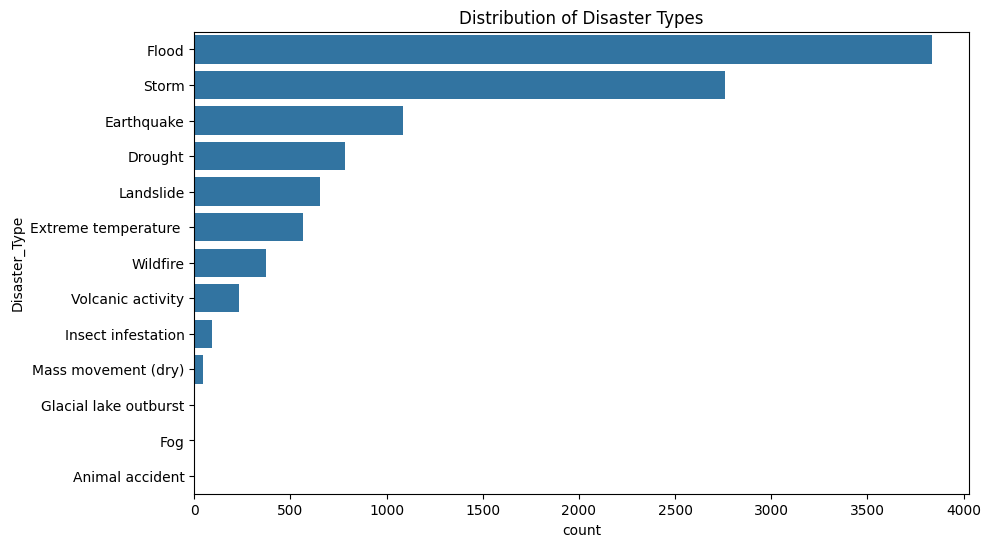

In [ ]:
# Disaster Type counts
plt.figure(figsize=(10,6))
sns.countplot(y='Disaster_Type', data=df, order=df['Disaster_Type'].value_counts().index)
plt.title("Distribution of Disaster Types")
plt.show()

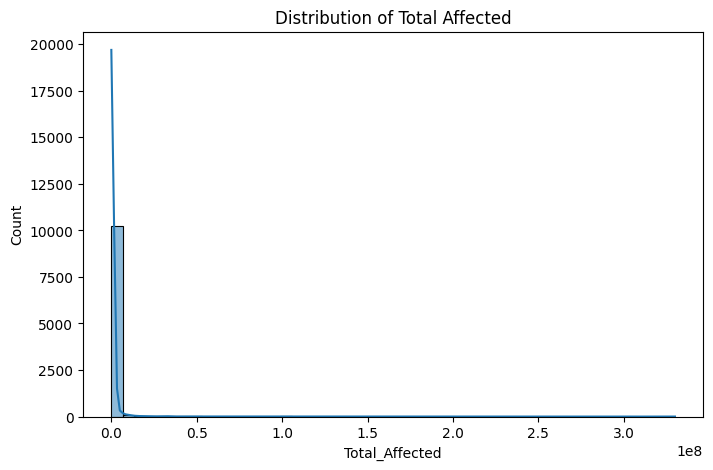

In [ ]:
# Total Affected distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Affected'], bins=50, kde=True)
plt.title("Distribution of Total Affected")
plt.show()

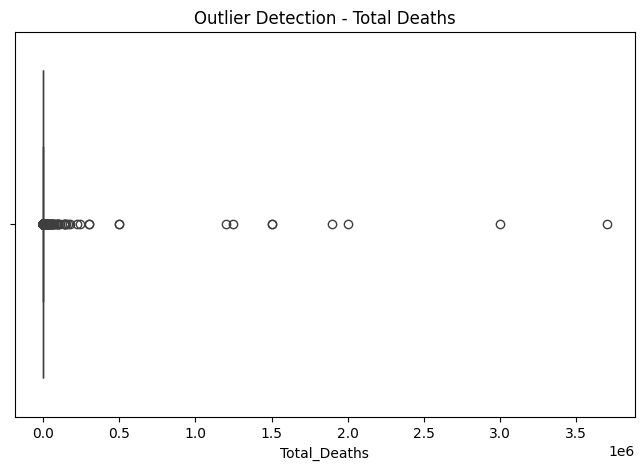

In [ ]:
# Deaths distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Total_Deaths'])
plt.title("Outlier Detection - Total Deaths")
plt.show()

###Bivariate Analysis (two features at a time)

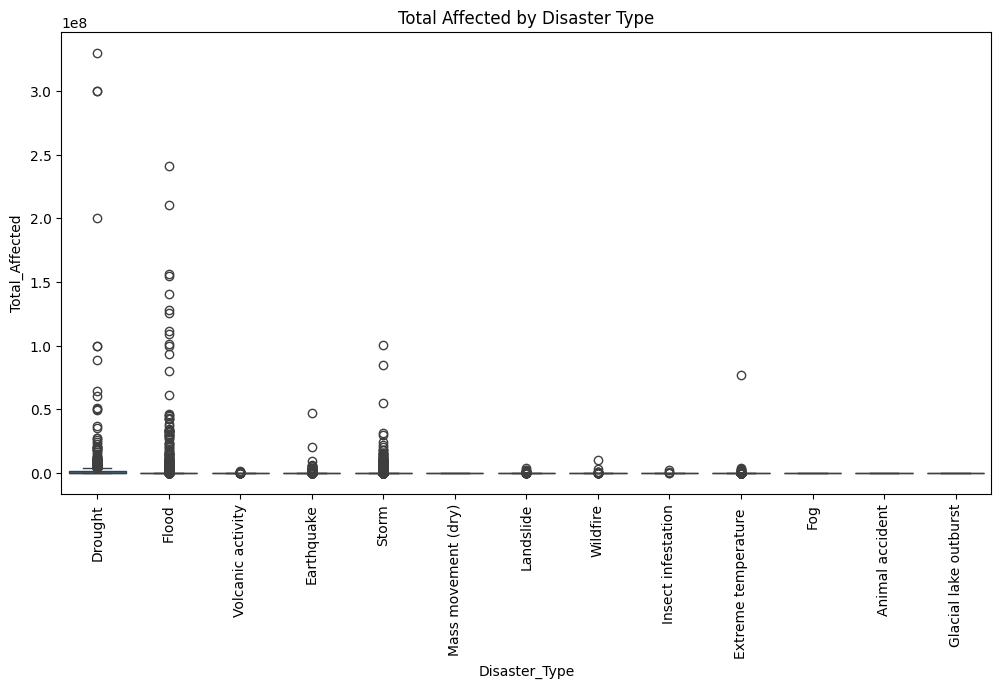

In [ ]:
# Disaster type vs affected population
plt.figure(figsize=(12,6))
sns.boxplot(x='Disaster_Type', y='Total_Affected', data=df)
plt.xticks(rotation=90)
plt.title("Total Affected by Disaster Type")
plt.show()

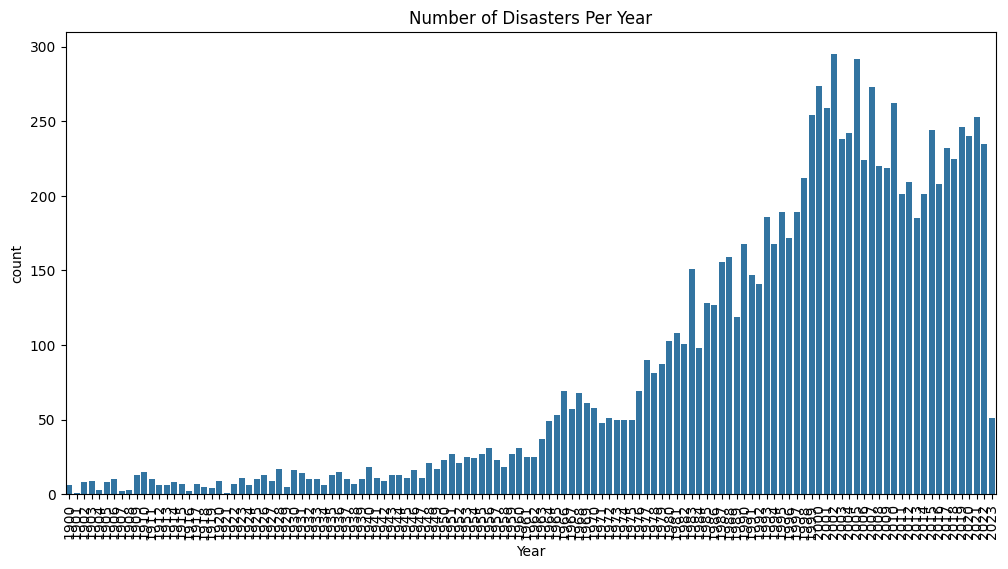

In [ ]:
# Year vs number of disasters
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.title("Number of Disasters Per Year")
plt.show()

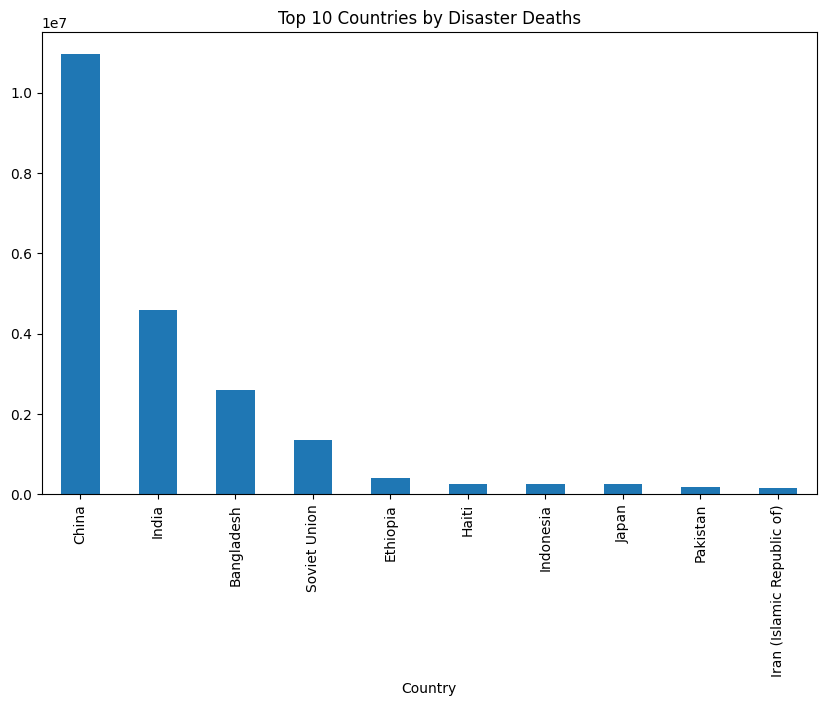

In [ ]:
# Country vs Total Deaths (top 10)
top_countries = df.groupby('Country')['Total_Deaths'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Countries by Disaster Deaths")
plt.show()

###Multivariate Analysis (more than two features)

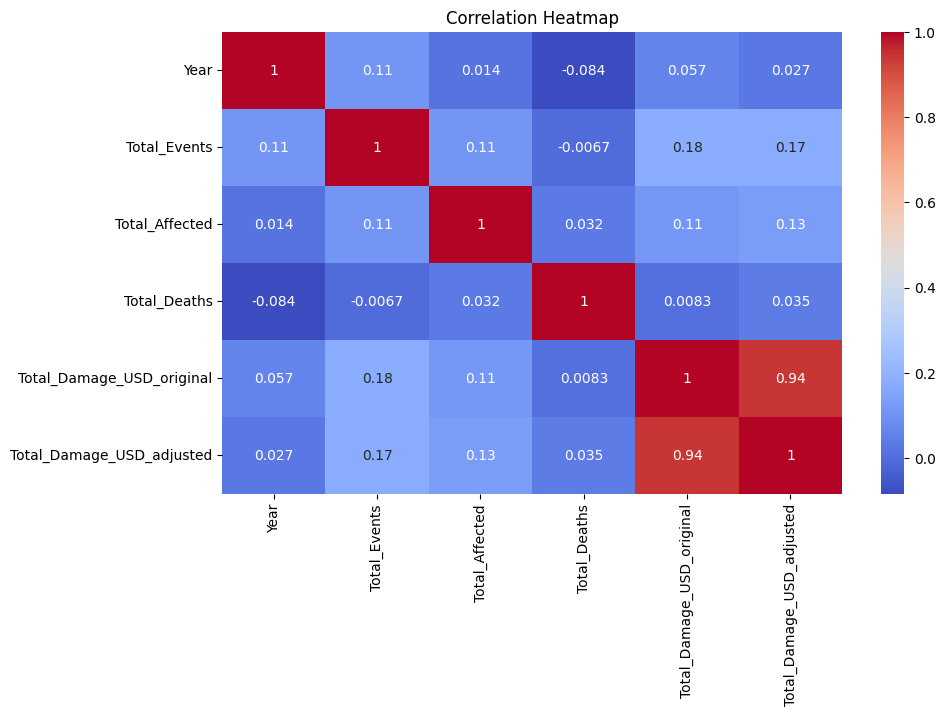

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

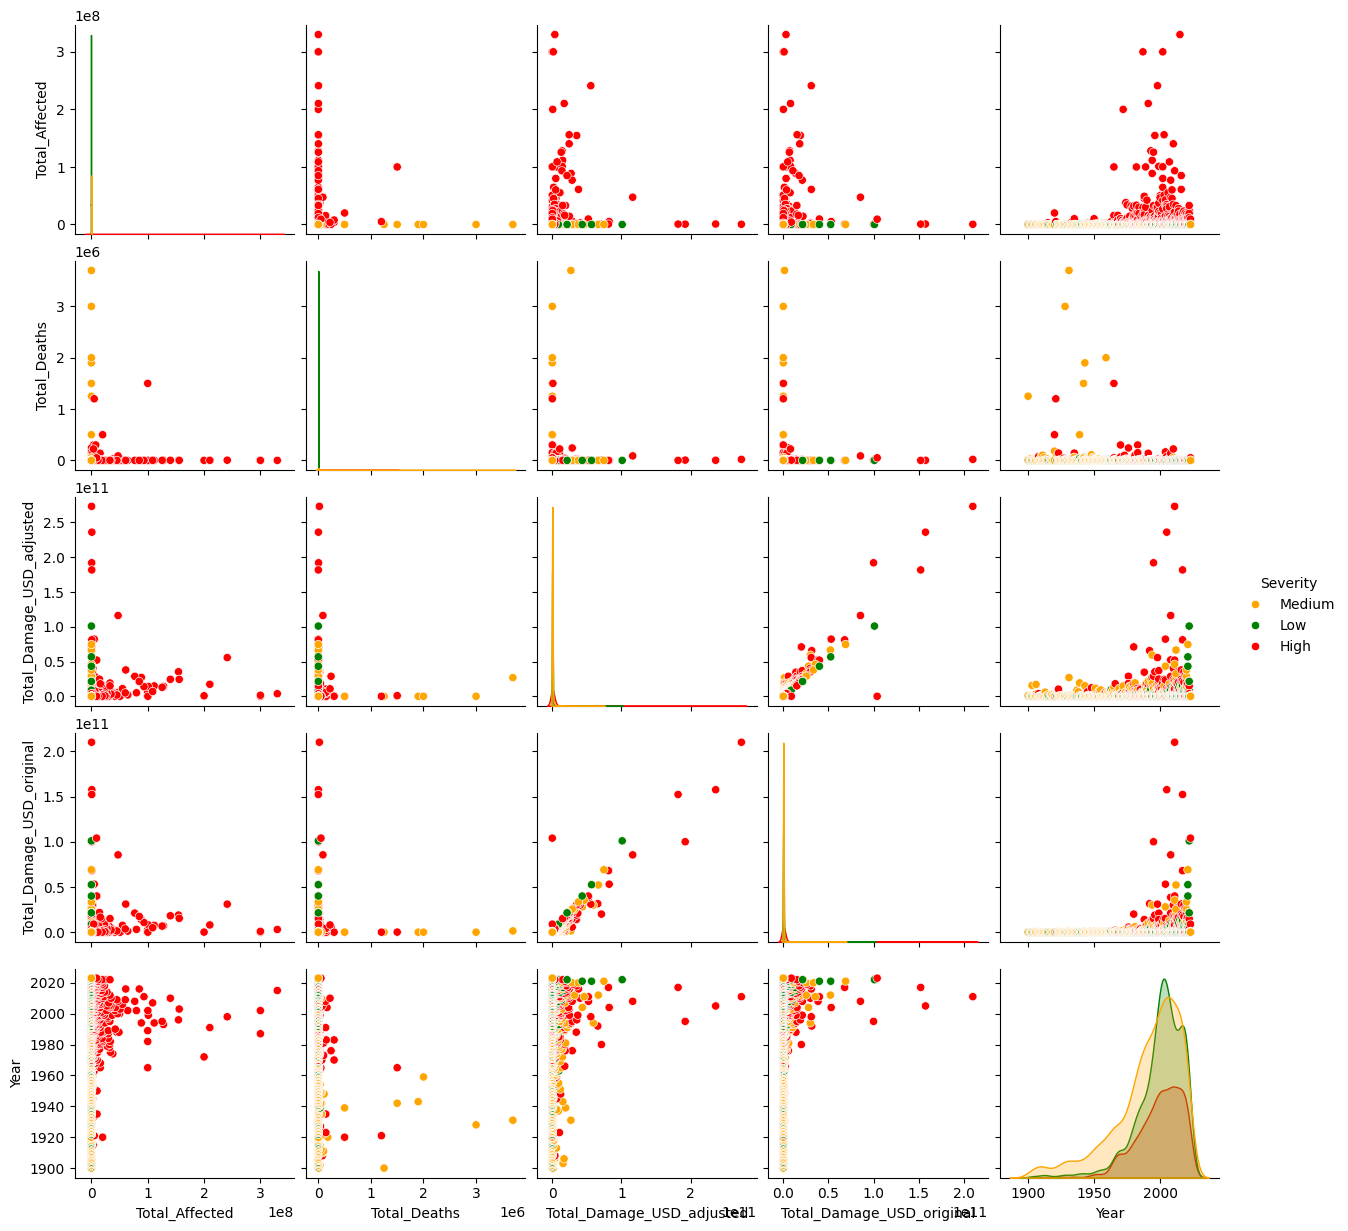

In [ ]:
# Pairplot (relationships across multiple variables)
def severity_label(x):
    if x < 10000:
        return "Low"
    elif x < 100000:
        return "Medium"
    else:
        return "High"

df['Severity'] = df['Total_Affected'].apply(severity_label)
sns.pairplot(
    df[['Total_Affected','Total_Deaths','Total_Damage_USD_adjusted','Total_Damage_USD_original','Year','Severity']],
    diag_kind='kde',
    hue='Severity',
    palette={'Low':'green','Medium':'orange','High':'red'}
)
plt.show()

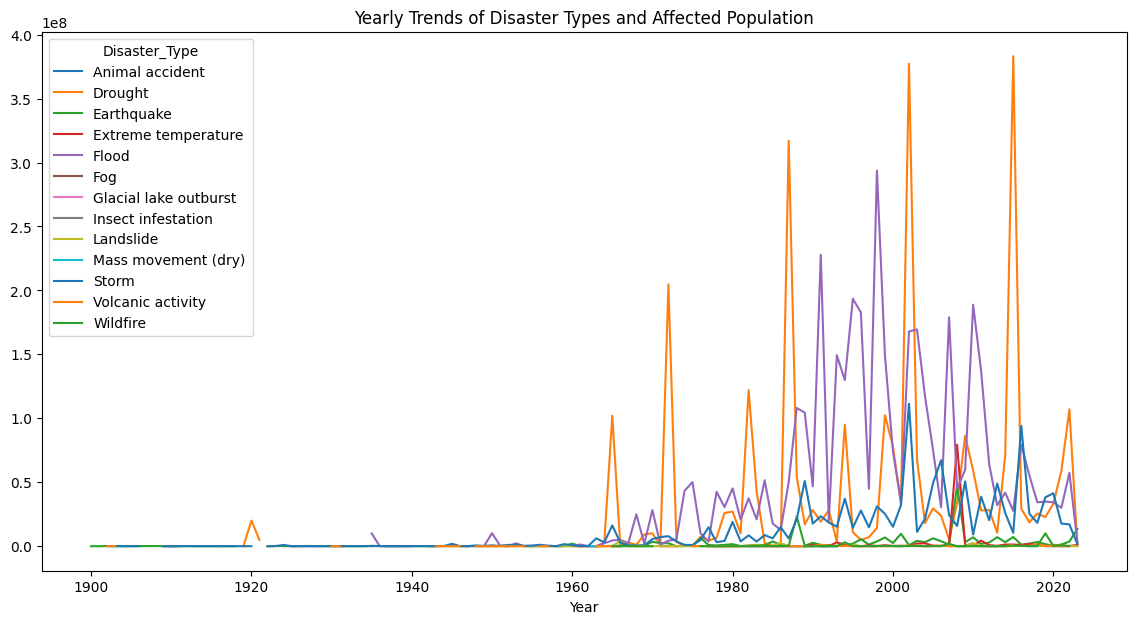

In [ ]:
# Disaster type vs year vs affected (3D relationship)
pivot_table = df.pivot_table(values='Total_Affected', index='Year', columns='Disaster_Type', aggfunc='sum')
pivot_table.plot(kind='line', figsize=(14,7))
plt.title("Yearly Trends of Disaster Types and Affected Population")
plt.show()

####
Floods and storms affect the most people; earthquakes have fewer events but higher death tolls.

### Data preparation/Data Transformation

In [ ]:
# Numeric columns
num_cols = [
    "Total_Events",
    "Total_Affected",
    "Total_Deaths",
    "Total_Damage_USD_adjusted"
]

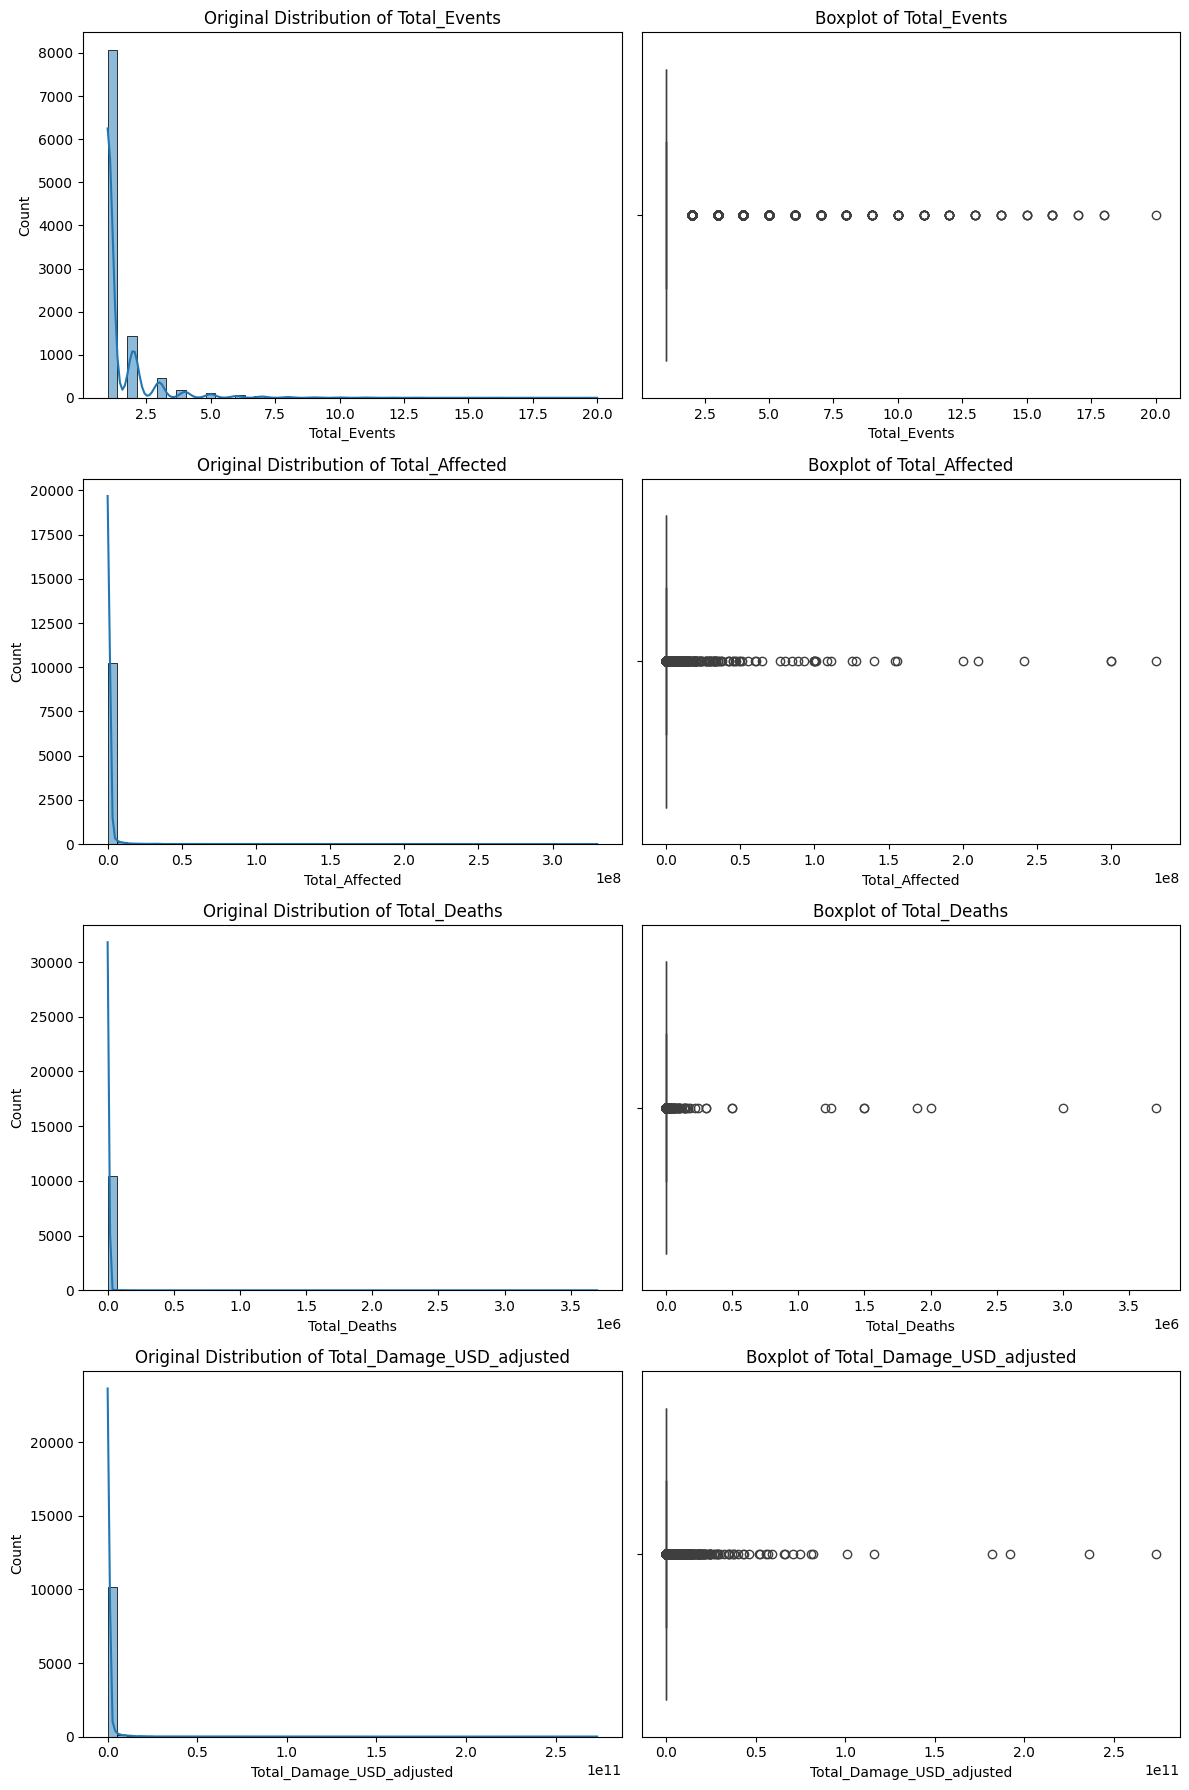

In [ ]:
# 1. Check Distributions Before Transformation
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 18))
for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(df[col], bins=50, ax=axes[i,0], kde=True)
    axes[i,0].set_title(f"Original Distribution of {col}")

    # Boxplot for outliers
    sns.boxplot(x=df[col], ax=axes[i,1])
    axes[i,1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
 #2. Apply Log Transformation (for skewed columns)
skewed_cols = ["Total_Affected", "Total_Deaths", "Total_Damage_USD_adjusted"]
for col in skewed_cols:
    df[f"Log_{col}"] = np.log1p(df[col])

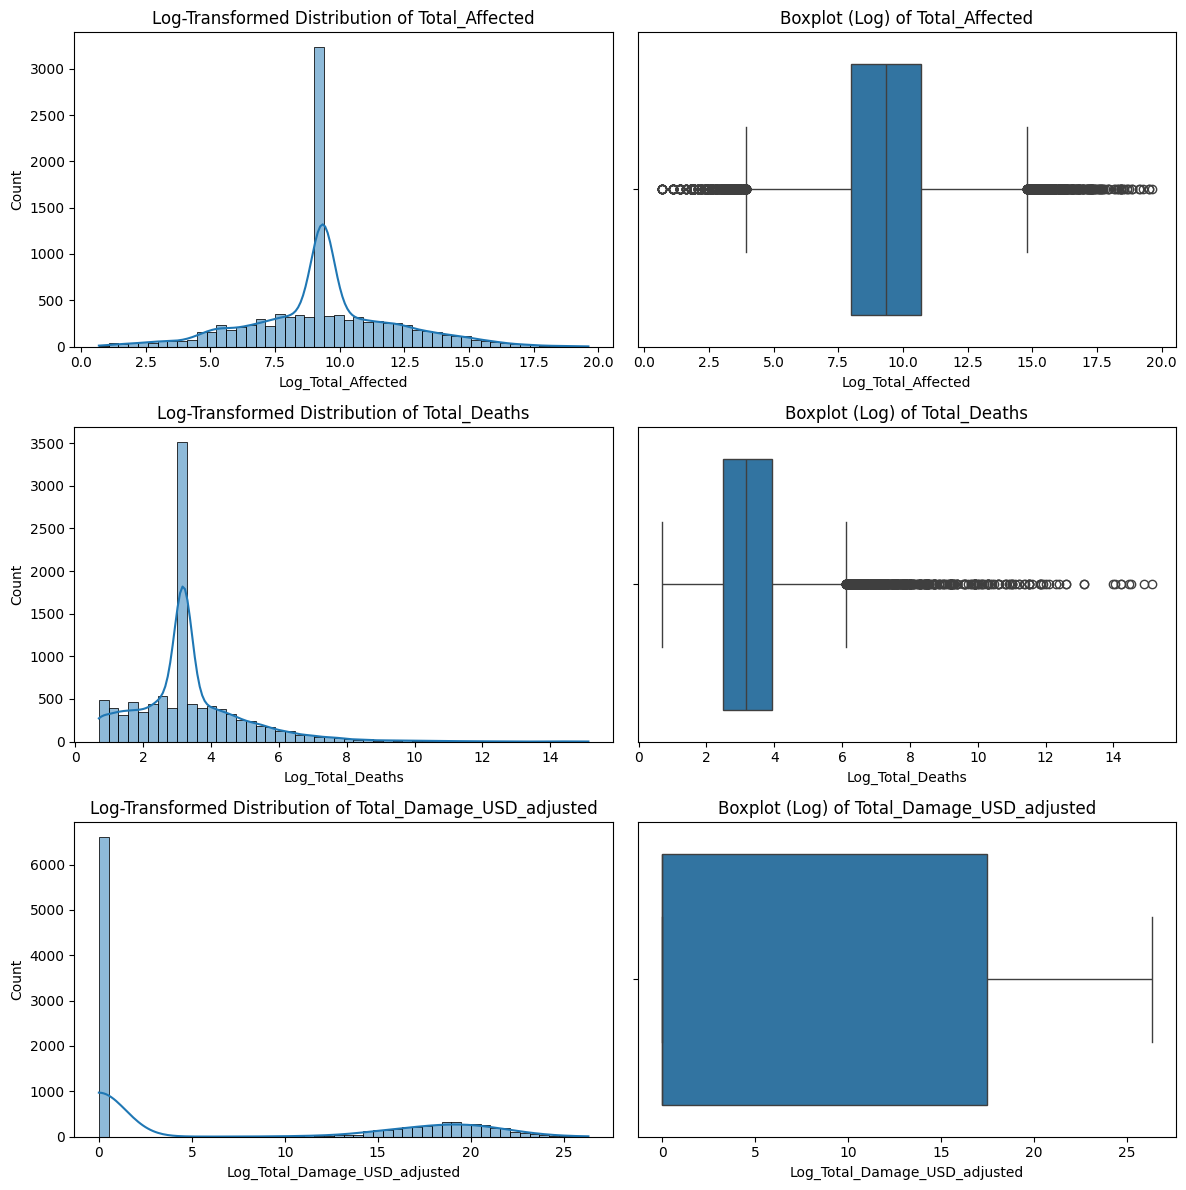

In [ ]:
# 3. Check Distributions After Transformation
fig, axes = plt.subplots(len(skewed_cols), 2, figsize=(12, 12))
for i, col in enumerate(skewed_cols):
    new_col = f"Log_{col}"

    sns.histplot(df[new_col], bins=50, ax=axes[i,0], kde=True)
    axes[i,0].set_title(f"Log-Transformed Distribution of {col}")

    sns.boxplot(x=df[new_col], ax=axes[i,1])
    axes[i,1].set_title(f"Boxplot (Log) of {col}")

plt.tight_layout()
plt.show()

#### Insight:
Log transformation reduced skewness and improved normality of affected population and damage distributions.

###Feature Selection

In [ ]:
df.columns

Index(['Year', 'Country', 'ISO', 'Disaster_Group', 'Disaster_Subroup',
       'Disaster_Type', 'Disaster_Subtype', 'Total_Events', 'Total_Affected',
       'Total_Deaths', 'Total_Damage_USD_original',
       'Total_Damage_USD_adjusted', 'CPI', 'Severity', 'Log_Total_Affected',
       'Log_Total_Deaths', 'Log_Total_Damage_USD_adjusted'],
      dtype='object')

In [ ]:
#drop unnecessary columns
df = df.drop(columns=[
    'Total_Damage_USD_original',  # redundant
    'CPI',                        # irrelevant
    'ISO',                        # redundant with Country
    'Severity',                   # only for visualization
    'Log_Total_Affected',         # EDA helper
    'Log_Total_Deaths',           # EDA helper
    'Log_Total_Damage_USD_adjusted' # EDA helper
])

print("Remaining Columns:", df.columns)

Remaining Columns: Index(['Year', 'Country', 'Disaster_Group', 'Disaster_Subroup',
       'Disaster_Type', 'Disaster_Subtype', 'Total_Events', 'Total_Affected',
       'Total_Deaths', 'Total_Damage_USD_adjusted'],
      dtype='object')


In [ ]:
# Feature Importance with Random Forest
# Separate X and y
X = df.drop(columns=['Total_Affected'])
y = df['Total_Affected']

In [ ]:
#Encoding categoricals
X_enc = X.copy()
for col in X_enc.select_dtypes(include='object').columns:
    X_enc[col] = X_enc[col].astype('category').cat.codes

In [ ]:
# Train quick RandomForest to get feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_enc, y)

RandomForestRegressor(random_state=42)

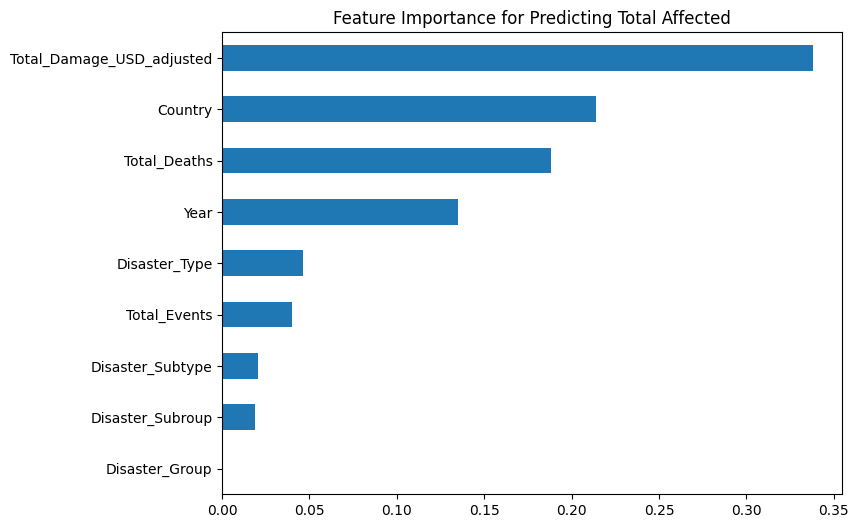

In [ ]:
# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X_enc.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance for Predicting Total Affected")
plt.show()

Insight:
#### Helps explain what drives predictions (e.g., deaths, damage, type of disaster).

In [ ]:
# Define Target & Features
y = df['Total_Affected']
X = df.drop(columns=['Total_Affected'])

In [ ]:
# Define Columns
numeric_features = ['Year', 'Total_Events', 'Total_Deaths', 'Total_Damage_USD_adjusted']
categorical_features = ['Country', 'Disaster_Group', 'Disaster_Subroup',
                        'Disaster_Type', 'Disaster_Subtype']

In [ ]:
# Build Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),    # scale numeric
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # encode categorical
    ]
)

In [ ]:
# Split Train/Test
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Fit on Training Data and Transform
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans  = preprocessor.transform(X_test)


In [ ]:
print("Transformed shapes -> Train:", X_train_trans.shape, " Test:", X_test_trans.shape)

Transformed shapes -> Train: (8344, 272)  Test: (2087, 272)


In [ ]:
# Log-transform Target
y_train = np.log1p(y_train_raw)
y_test  = np.log1p(y_test_raw)

 Insight:
#### Prevents data leakage — test data remains unseen during training.

###Model Training

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_trans, y_train)

LinearRegression()

In [ ]:
# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_trans, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_trans, y_train)

RandomForestRegressor(random_state=42)

 Insight:
#### Comparing different models helps us see if linear assumptions work or we need complex models.

###Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"📊 {model_name} Evaluation:")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")
    print("-"*40)
    return mae, rmse, r2

In [ ]:
# Predictions
y_pred_lin = lin_reg.predict(X_test_trans)
evaluate_model(np.expm1(y_test), np.expm1(y_pred_lin), "Linear Regression")

y_pred_tree = tree_reg.predict(X_test_trans)
evaluate_model(np.expm1(y_test), np.expm1(y_pred_tree), "Decision Tree")

y_pred_rf = rf_reg.predict(X_test_trans)
evaluate_model(np.expm1(y_test), np.expm1(y_pred_rf), "Random Forest")

📊 Linear Regression Evaluation:
MAE : 8572890.55
RMSE: 361586324.79
R²  : -6138.024
----------------------------------------
📊 Decision Tree Evaluation:
MAE : 747515.77
RMSE: 7904858.08
R²  : -1.934
----------------------------------------
📊 Random Forest Evaluation:
MAE : 530283.15
RMSE: 4189739.89
R²  : 0.176
----------------------------------------


(530283.145015766, np.float64(4189739.8939618673), 0.1757679901588124)

Insight:
#### MAE = average error in people, RMSE = penalizes outliers, R² = variance explained

###Model Tuning (Random Forest with GridSearchCV)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],       # number of trees
    'max_depth': [10, 20, None],      # depth of trees
    'min_samples_split': [2, 5, 10]   # min samples to split a node
}

In [ ]:
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search.fit(X_train_trans, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [ ]:
# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Predictions (convert back from log scale)
y_pred_best_log = best_rf.predict(X_test_trans)
y_pred_best = np.expm1(y_pred_best_log)   # predicted in original scale
y_test_orig = np.expm1(y_test)            # actual in original scale

In [ ]:
evaluate_model(y_test_orig, y_pred_best, "Tuned Random Forest")

📊 Tuned Random Forest Evaluation:
MAE : 531949.98
RMSE: 4206576.04
R²  : 0.169
----------------------------------------


(531949.9776786139, np.float64(4206576.040372227), 0.16913045525065895)

Insight:
#### Hyperparameter tuning balances bias-variance → improves generalization.

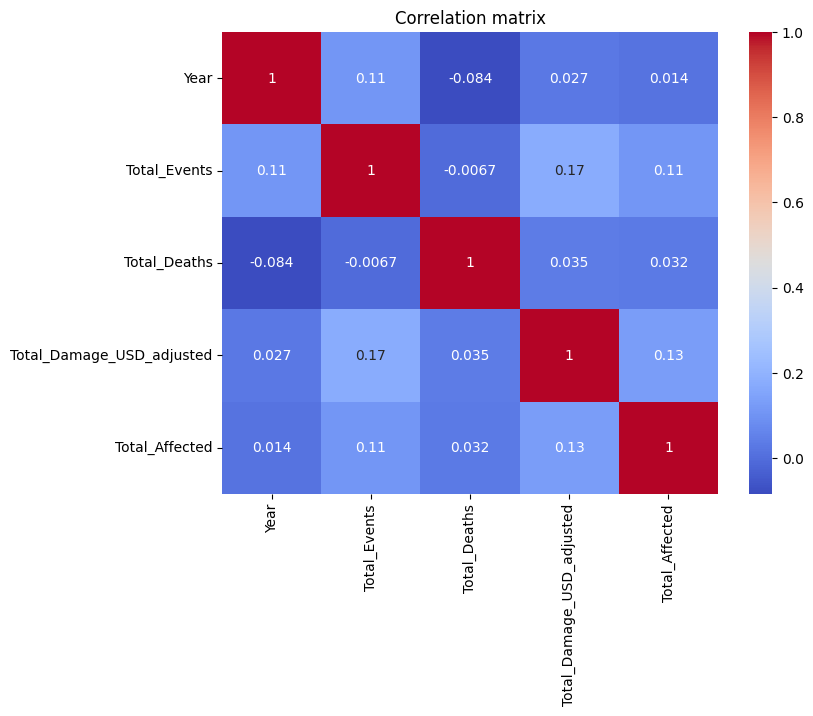

In [ ]:
num_cols = ['Year','Total_Events','Total_Deaths','Total_Damage_USD_adjusted','Total_Affected']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

###Final testing and saving

In [ ]:
y_test_orig = np.expm1(y_test)

In [ ]:
# Predictions (still in log scale)
y_pred_lin_log = lin_reg.predict(X_test_trans)
y_pred_tree_log = tree_reg.predict(X_test_trans)
y_pred_rf_log = rf_reg.predict(X_test_trans)

In [ ]:
# Convert predictions back to original scale
y_pred_lin = np.expm1(y_pred_lin_log)
y_pred_tree = np.expm1(y_pred_tree_log)
y_pred_rf = np.expm1(y_pred_rf_log)

In [ ]:
# Evaluate all models
evaluate_model(y_test_orig, y_pred_lin, "Linear Regression")
evaluate_model(y_test_orig, y_pred_tree, "Decision Tree")
evaluate_model(y_test_orig, y_pred_rf, "Random Forest")

📊 Linear Regression Evaluation:
MAE : 8572890.55
RMSE: 361586324.79
R²  : -6138.024
----------------------------------------
📊 Decision Tree Evaluation:
MAE : 747515.77
RMSE: 7904858.08
R²  : -1.934
----------------------------------------
📊 Random Forest Evaluation:
MAE : 530283.15
RMSE: 4189739.89
R²  : 0.176
----------------------------------------


(530283.145015766, np.float64(4189739.8939618673), 0.1757679901588124)

In [ ]:
residuals = y_test_orig - y_pred_best

Text(0.5, 1.0, 'Predicted vs Actual')

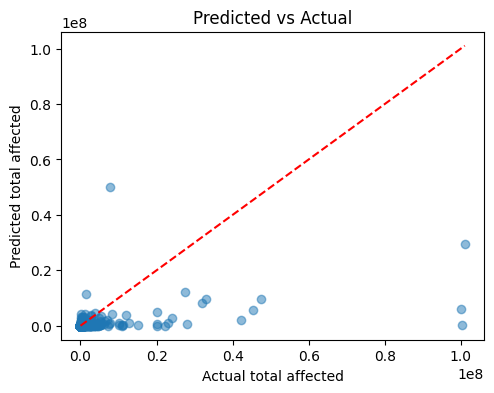

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(y_test_orig, y_pred_best, alpha=0.5)
plt.plot([0, max(y_test_orig)], [0, max(y_test_orig)], 'r--')
plt.xlabel("Actual total affected")
plt.ylabel("Predicted total affected")
plt.title("Predicted vs Actual")

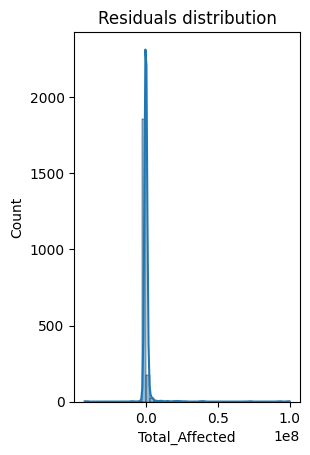

In [ ]:
plt.subplot(1,2,2)
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals distribution")
plt.show()

Insights:

Points along the red line indicate good predictions.

Skewed residuals or long tails show certain outliers the model struggles with.

If residuals are randomly spread → model is good

If residuals show pattern → model misses something

In [ ]:
joblib.dump(best_rf, "shelter_model_rf.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")
# optionally save also feature lists / meta
joblib.dump(numeric_features, "numeric_features.pkl")
joblib.dump(categorical_features, "categorical_features.pkl")


['categorical_features.pkl']

Insight:
#### Saves time — we don’t need to retrain for deployment.